Use digits mnist dataset and fashion mnist dataset to build a neural network

In [59]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [61]:
X_train = X_train/255
X_test = X_test/255

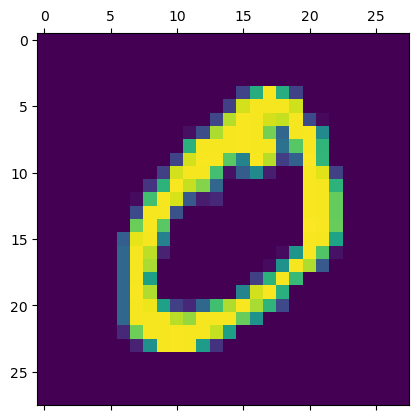

In [62]:
plt.matshow(X_train[1])

In [63]:
y_train[1]

0

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 20)                15700     
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [67]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 1s 653us/step - loss: 0.4016 - accuracy: 0.8875


In [68]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 533us/step - loss: 0.2500 - accuracy: 0.9291


[0.24997609853744507, 0.929099977016449]

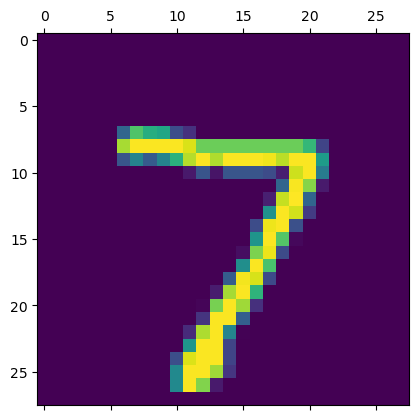

In [69]:
plt.matshow(X_test[0])

In [70]:
np.argmax(model.predict(X_test)[0])


313/313 [==============================] - 0s 441us/step


7

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [72]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_labels.shape

(60000,)

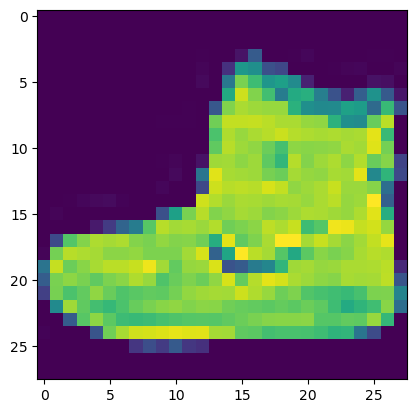

In [76]:
plt.imshow(train_images[0])

In [77]:
train_labels[0]

9

In [78]:
class_names[train_labels[0]]

'Ankle boot'

In [79]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [80]:
def get_model(hidden_layers=1):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [81]:
model = get_model(1)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3204 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8967


In [82]:
class_names[test_labels[0]]

'Ankle boot'

In [83]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'